<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Develope_My_First_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Define Constants
batch_size = 100
iteration = 100
num_class = 10

In [3]:
#Download Mnist Dataset
mnist = keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

#encode to real number
train_images = train_images/255
test_images = test_images/255

#Modeling 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense( num_class ,activation='softmax')
])
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=iteration, batch_size=batch_size)



Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


600/600 [==============================] - 2s 3ms/step - loss: 0.3310 - accuracy: 0.9072
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1544 - accuracy: 0.9557
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1095 - accuracy: 0.9685
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0834 - accuracy: 0.9753
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0678 - accuracy: 0.9802
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0554 - accuracy: 0.9833
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0457 - accuracy: 0.9866
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0394 - accuracy: 0.9884
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0321 - accuracy: 0.9909
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0271 - accuracy: 0.9927
E

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuarcy', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9799
Test Accuarcy 0.9799000024795532


In [12]:
#Helper function to display digit images

def show_sample(images, labels, sample_count=25):
  #create a Square with can fit{sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  print(grid_count)
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

5


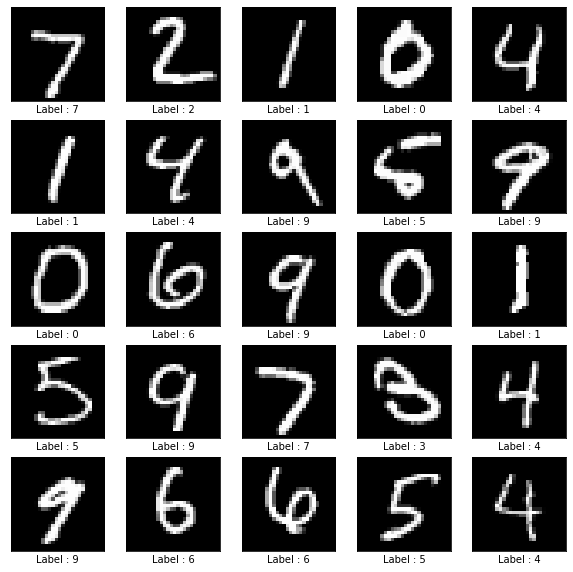

In [13]:
#show the first 25images in the training Dataset
show_sample(test_images, ['Label : %s' % label for label in test_labels])

Text(0, 0.5, 'ac')

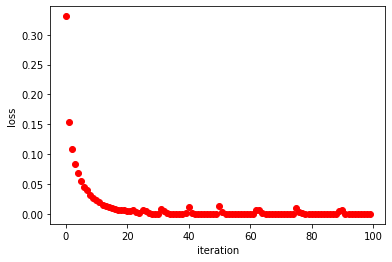

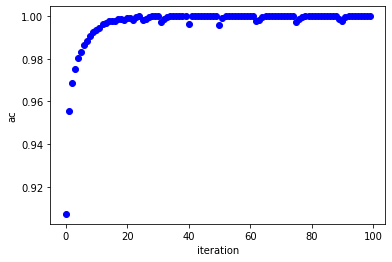

In [17]:
#Evaluate the model using test dataset
fig,loss_ax = plt.subplots()
fig,acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'],'ro')
loss_ax.set_xlabel('iteration')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['accuracy'],'bo')
acc_ax.set_xlabel('iteration')
acc_ax.set_ylabel('accuracy')

5


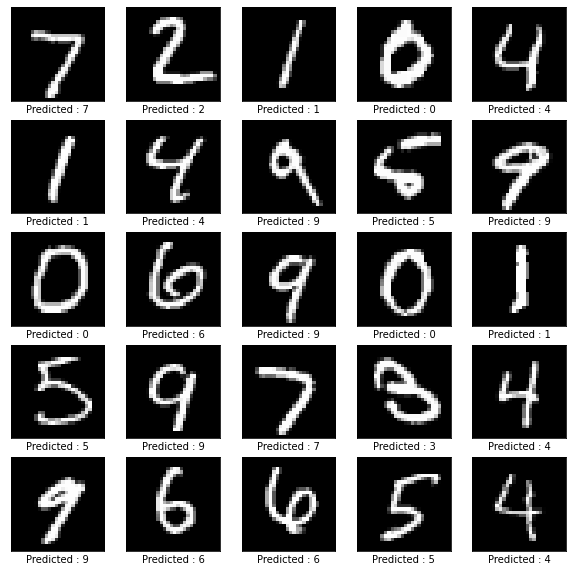

Number is  7


NameError: ignored

In [24]:
#Predict digit images to labels
predictions = model.predict(test_images)
show_sample(test_images, ['Predicted : %d' %np.argmax(result) for result in predictions])
Digit = 1 #@param{type:"slider", min:0, max:8000, step:1}
selected_digit = Digit-1
result = predictions[selected_digit]
result_number = np.argmax(result)
print('Number is %2d' %result_number)
show_digit_image(test_images[selected_digit])